In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc","fConcl","fAsym","fm3Long", "fm3Trans","fAlpha","fDist", "class"]
df = pd.read_csv("magic04.data", names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fm3Long,fm3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"] = (df["class"] =="g").astype(int)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fm3Long,fm3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


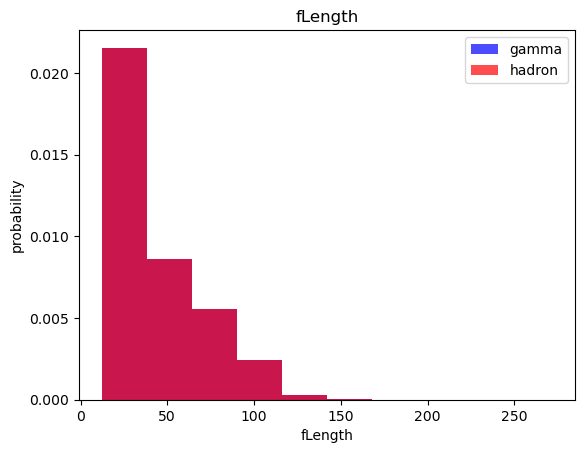

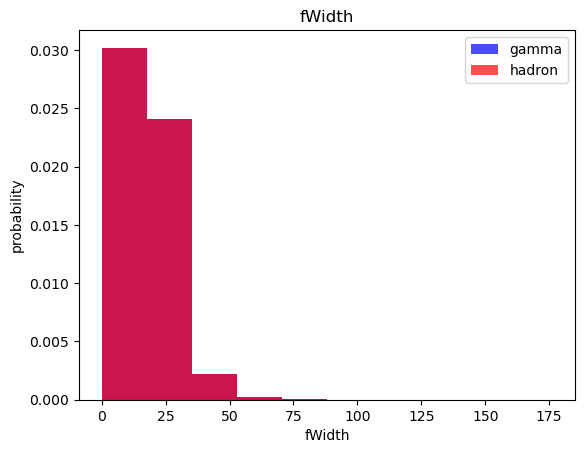

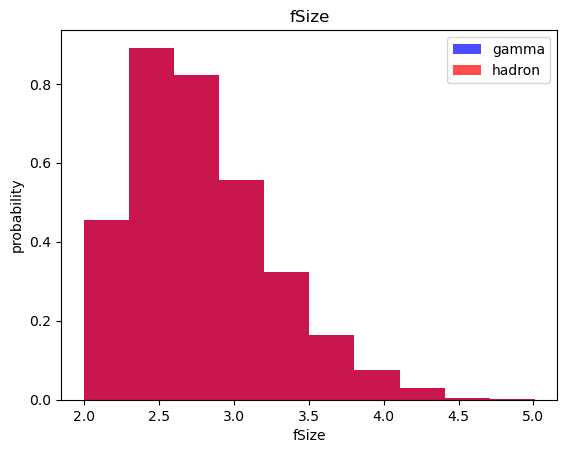

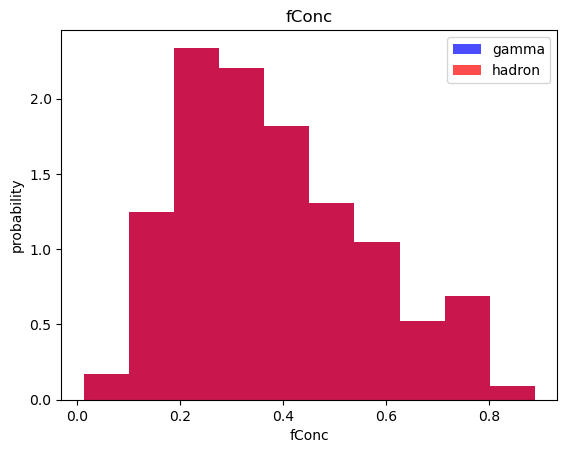

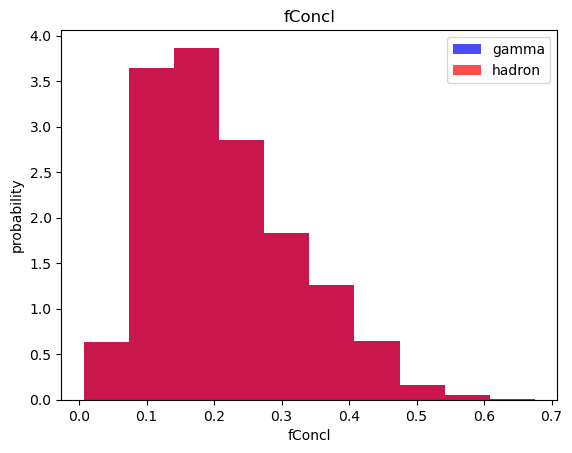

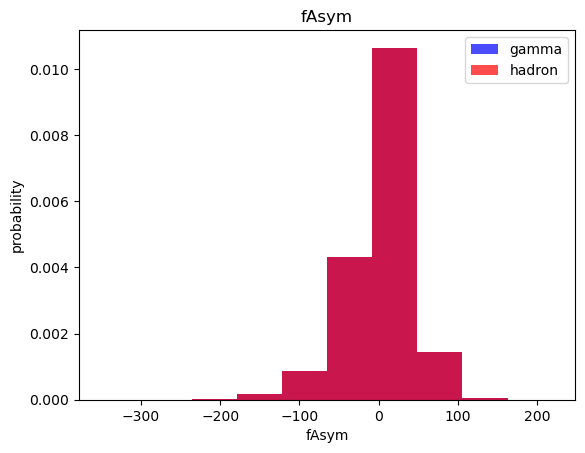

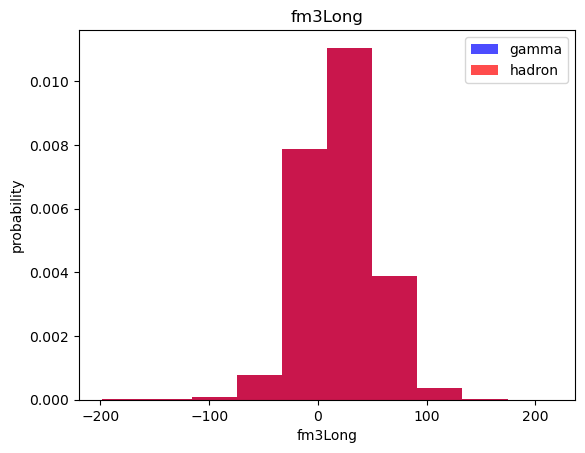

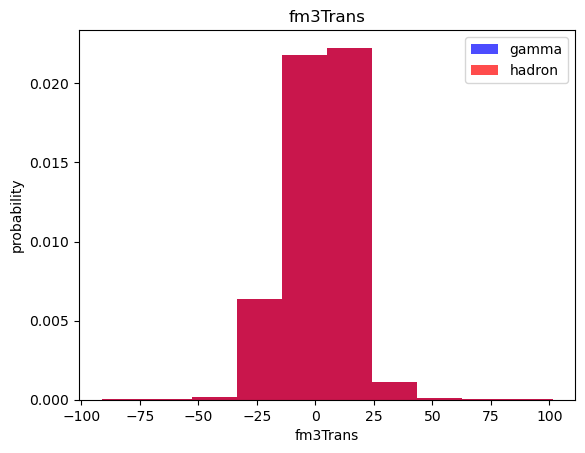

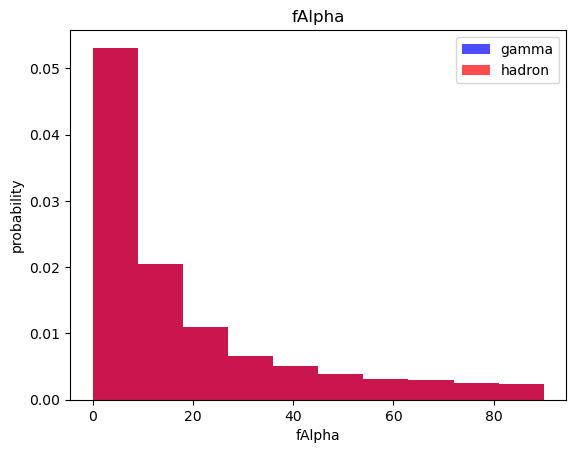

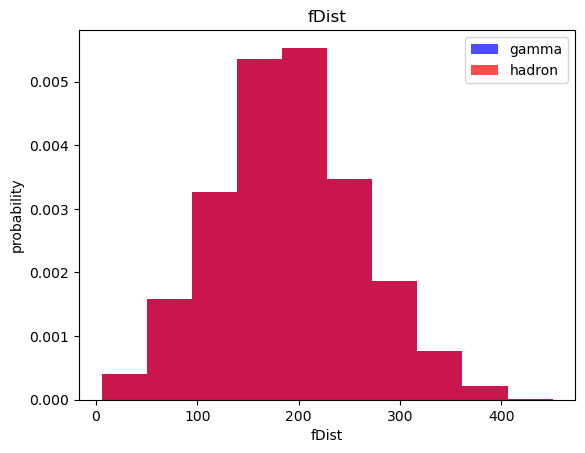

In [ ]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color= 'blue', label='gamma',alpha=0.7,density=True)
    plt.hist(df[df["class"]==1][label], color= 'red', label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()
    

# Train validation and test dataset

In [ ]:
train, valid, test  = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample=False ):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    
    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)
    data = np.hstack((x,np.reshape(y,(-1, 1))))
    return data, x, y

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample= True)
valid, x_valid, y_valid = scale_dataset(valid, oversample= False)
test, x_test, y_test= scale_dataset(test, oversample= False)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

 # KNN
 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report



UndefVarError: UndefVarError: `from` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred = knn_model.predict(x_test)fr

In [ ]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1334
           1       0.85      0.86      0.85      2470

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.41      0.51      1334
           1       0.74      0.90      0.81      2470

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71      1334
           1       0.85      0.82      0.83      2470

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1334
           1       0.89      0.91      0.90      2470

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



# Neural Networks

* ML Libraries

In [ ]:
#Tensorflow
import tensorflow as tf

In [ ]:
def plot_loss(history):
    figg, (ax1, ax2) = plt.subplots(1,2)
    ax1.plt.plot(history.history['loss'], label='loss')
    ax1.plt.plot(history.history['val_loss'], label='val_loss')
    ax1.plt.xlabel('Epoch')
    ax1.plt.ylabel('binnary crossentropy')
    ax1.plt.legend()
    ax1.plt.grid(True)
    
    ax2.plt.plot(history.history['accuracy'], label='accuracy')
    ax2.plt.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.plt.xlabel('Epoch')
    ax2.plt.ylabel('accuracy')
    
    ax1.plt.show()
    


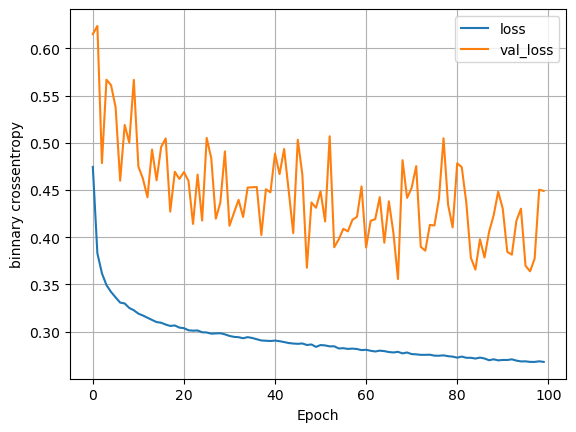

In [ ]:
plot_history(history)

In [ ]:
def train_model(x_train, y_train, num_nodes,dropout_prob,lr,batch_size, epochs):
    
    nn_model = tf.keras.Sequential([
     tf.keras.layers.Input(shape=(10,)), 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
    
])
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',metrics=['accuracy'])
    history = nn_model.fit(x_train,y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return nn_model, history

16 nodes,dropout0, lr 0.01, batch_size 32


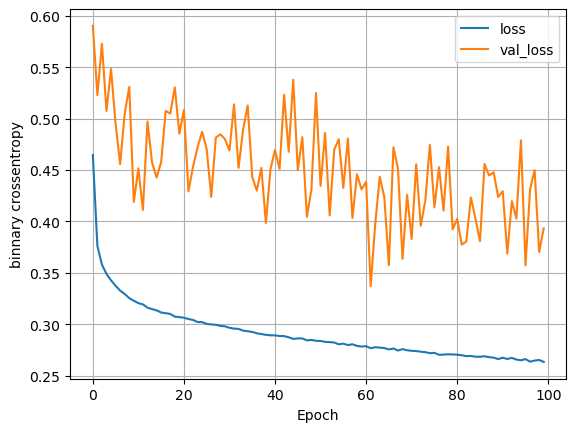

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.3166


NameError: name 'valid_loss' is not defined

In [ ]:
least_val_loss = float('inf')
least_loss_model = None 
epochs = 100
for num_nodes  in [16,32,64]:
    for dropout_prob in [0,0,2]:
        for lr in [0.01,0.005,0.001]:
            for batch_size in [32,64,128]:
                
                print(f"{num_nodes} nodes,dropout{dropout_prob}, lr {lr}, batch_size {batch_size}")
                
                model, history = train_model(x_train, y_train, num_nodes,dropout_prob, lr,batch_size,epochs)
                plot_history(history)
                val_loss = model.evaluate(x_valid, y_valid)
                if valid_loss < least_val_loss:
                    least_loss_model = model
                

In [ ]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

AttributeError: 'NoneType' object has no attribute 'predict'

In [ ]:
print(classification_report(y_test, y_pred))

# Linear Regression